# Import Packages

In [1]:
import os
import sys
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

# Load Data

In [2]:
housing = pd.read_csv("datasets/housing/housing.csv")
print(housing.shape)
housing.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


housing.info()

In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


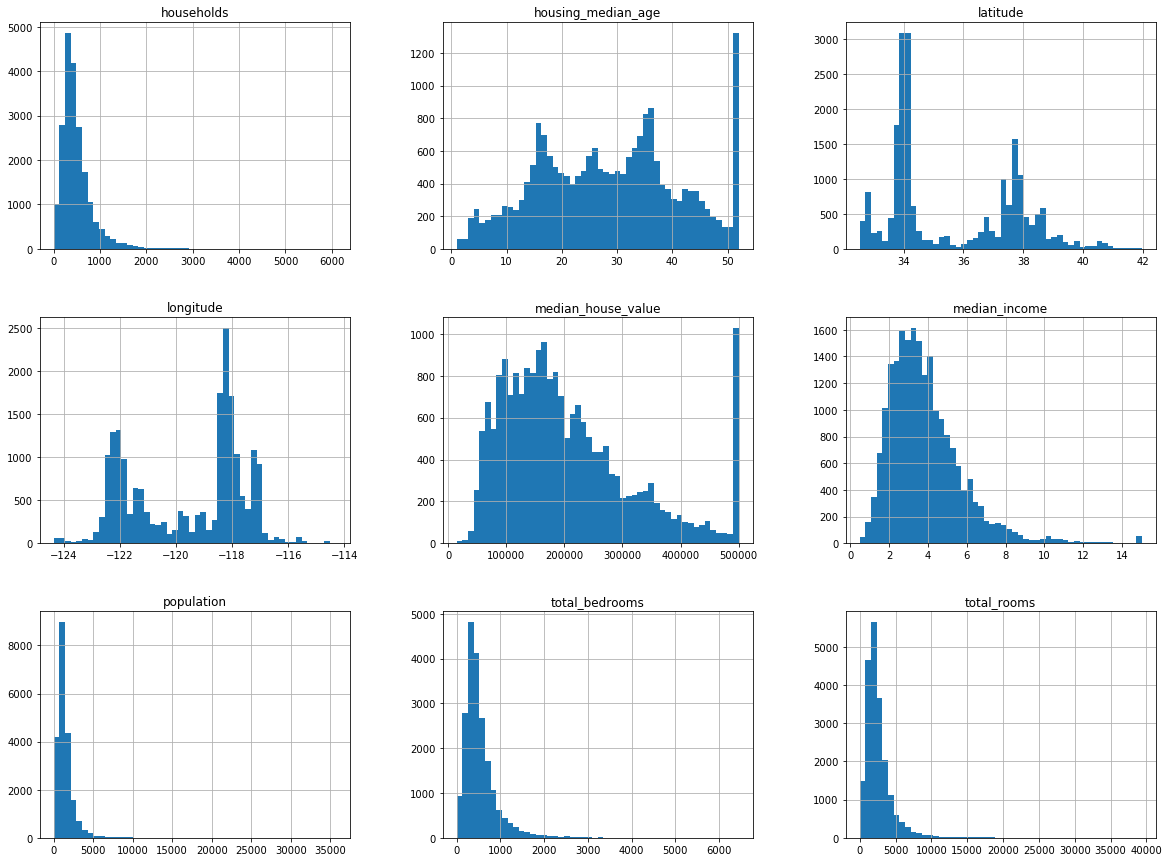

In [6]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [8]:
print(train_set.shape)
print(test_set.shape)

(16512, 10)
(4128, 10)


Train-Test Split 과정에서 Simple Random Sampling을 수행하면 Bias가 발생할 수 있다. 따라서 Stratified Sampling을 해준다. Strata를 나누는 기준은 종속변수에 대해 상관관계가 가장 높은 `median_income`으로 한다.

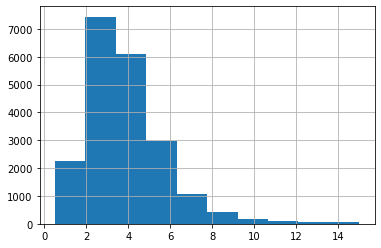

In [9]:
housing["median_income"].hist()

In [10]:
housing["income_cut"]=pd.cut(housing["median_income"], bins=[0., 1.5, 3., 4.5, 6, np.inf], labels=[1,2,3,4,5])

In [11]:
housing["income_cut"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cut, dtype: int64

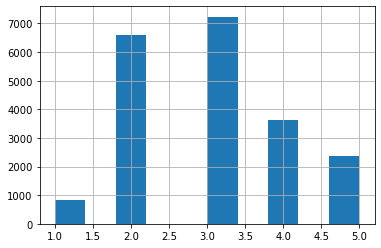

In [12]:
housing["income_cut"].hist()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cut"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
print(strat_train_set.shape)
print(strat_test_set.shape)

(16512, 11)
(4128, 11)


In [15]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


pd.DataFrame({
"Overall" : housing["income_cut"].value_counts() / len(housing),    
"Stratified" : strat_test_set["income_cut"].value_counts() / len(strat_test_set),
"Random" : test_set["income_cut"].value_counts() / len(test_set)    
})

,Overall,Stratified,Random
3,0.350581,0.350533,0.358527
2,0.318847,0.318798,0.324370
4,0.176308,0.176357,0.167393
5,0.114438,0.114583,0.109496
1,0.039826,0.039729,0.040213


그렇게 큰 차이는 없지만, 그래도 Stratified가 더 비슷하다.

In [16]:
strat_train_set.drop(columns="income_cut", inplace=True)
strat_test_set.drop(columns="income_cut", inplace=True)

# Discover and Visualize the Data to Gain Insights

In [17]:
housing = strat_train_set.copy()

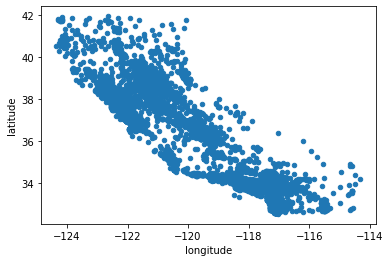

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

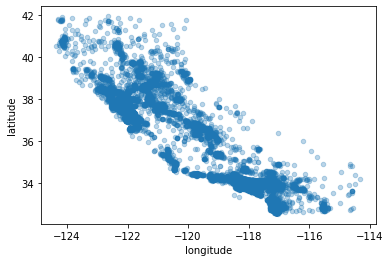

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3)
plt.show()

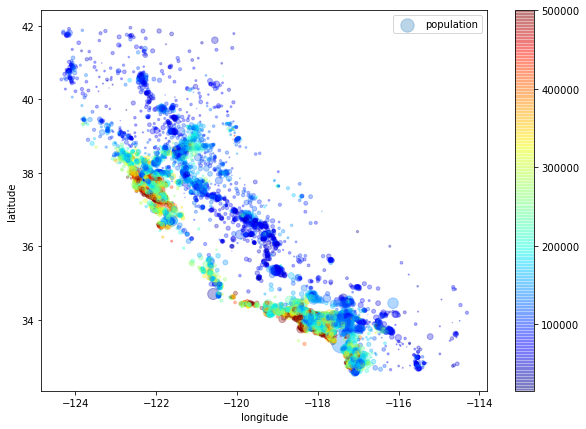

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3,
            s=housing["population"]/100, label="population", figsize=(10,7), 
            c=housing["median_house_value"], cmap=plt.get_cmap('jet'), colorbar=True, sharex=False)
plt.legend()

## Correlation

In [21]:
corr = housing.corr()

In [23]:
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

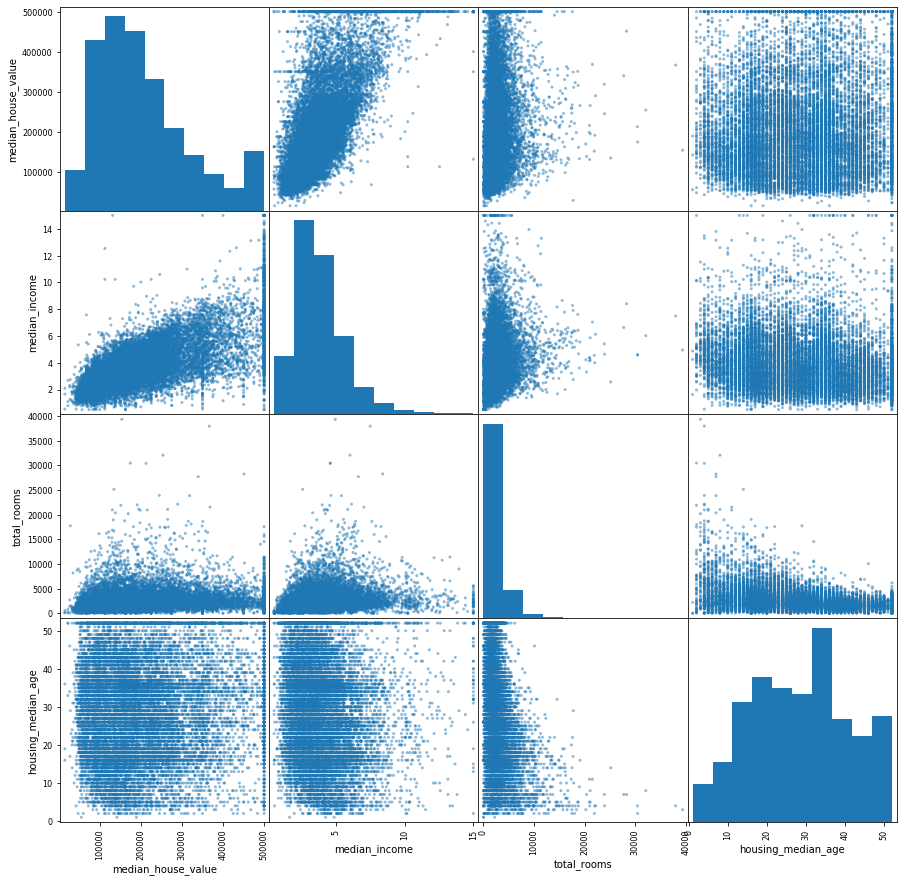

In [24]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(15,15))
plt.show()

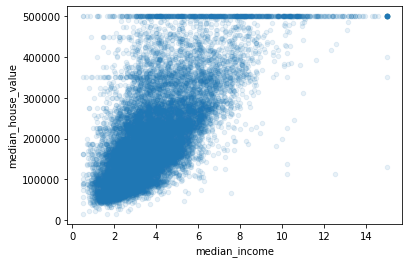

In [25]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

## Feature Engineering

In [26]:
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN


In [27]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [28]:
corr = housing.corr()
corr["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

유의미한 새로운 변수를 찾아냈다.

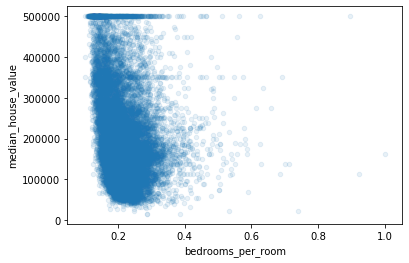

In [29]:
housing.plot(kind="scatter", x="bedrooms_per_room", y="median_house_value", alpha=0.1)
plt.show()

# Prepare the Data for Machine Learning Algorithms
train, test set에 모두 적용해줘야한다.

In [30]:
housing_train_X = strat_train_set.drop("median_house_value", axis=1)
housing_train_y = strat_train_set["median_house_value"].copy()

housing_test_X = strat_test_set.drop("median_house_value", axis=1)
housing_test_y = strat_test_set["median_house_value"].copy()

## NA(Missing Value)

In [31]:
housing_train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [32]:
housing_train_X.shape

(16512, 9)

In [33]:
#option1, delete row
housing_train_X.dropna(subset=["total_bedrooms"]).shape

(16354, 9)

In [34]:
#option2, delete col
housing_train_X.drop("total_bedrooms", axis=1).shape

(16512, 8)

In [35]:
#option3, imputation(median)
median = housing_train_X["total_bedrooms"].median()
housing_train_X["total_bedrooms"].fillna(median, inplace=True)
print(housing_train_X.shape)
housing_train_X.head()

(16512, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [36]:
housing_test_X["total_bedrooms"].fillna(median, inplace=True)
print(housing_test_X.shape)
housing_test_X.head()

(4128, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,INLAND


## FE

In [37]:
housing_train_X["rooms_per_household"] = housing_train_X["total_rooms"] / housing_train_X["households"]
housing_train_X["bedrooms_per_room"] = housing_train_X["total_bedrooms"] / housing_train_X["total_rooms"]
housing_train_X["population_per_household"] = housing_train_X["population"] / housing_train_X["households"]

In [38]:
housing_test_X["rooms_per_household"] = housing_test_X["total_rooms"] / housing_test_X["households"]
housing_test_X["bedrooms_per_room"] = housing_test_X["total_bedrooms"] / housing_test_X["total_rooms"]
housing_test_X["population_per_household"] = housing_test_X["population"] / housing_test_X["households"]

In [39]:
print(housing_train_X.shape)
print(housing_test_X.shape)

(16512, 12)
(4128, 12)


## Scaling

In [40]:
housing_train_X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [41]:
num = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

train_num = housing_train_X[num]
test_num = housing_test_X[num]

## MinMax Scaling

In [42]:
from sklearn import preprocessing

minmax_scaler = preprocessing.MinMaxScaler().fit(train_num)
train_num_minmax = minmax_scaler.transform(train_num)  

train_num_minmax = pd.DataFrame(train_num_minmax, columns=num)
print(train_num_minmax.shape)
train_num_minmax.head()

(16512, 11)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,0.245020,0.504782,0.725490,0.039731,0.056218,0.019816,0.062920,0.152019,0.024826,0.067348,0.001128
1,0.241036,0.479277,0.254902,0.017119,0.017075,0.008492,0.020724,0.408374,0.034653,0.043996,0.001622
2,0.712151,0.024442,0.588235,0.049499,0.075548,0.026150,0.085885,0.162908,0.021983,0.073633,0.001073
3,0.472112,0.400638,0.470588,0.046828,0.059439,0.040836,0.065534,0.095447,0.029137,0.059064,0.002771
4,0.573705,0.179596,0.313725,0.167523,0.245329,0.124891,0.272778,0.174811,0.023976,0.070047,0.001896


In [43]:
minmax_scaler = preprocessing.MinMaxScaler().fit(test_num)
test_num_minmax = minmax_scaler.transform(test_num)

test_num_minmax = pd.DataFrame(test_num_minmax, columns=num)
print(test_num_minmax.shape)
test_num_minmax

(4128, 11)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,0.601871,0.167021,0.549020,0.197548,0.156890,0.076293,0.157704,0.536662,0.162062,0.098116,0.018923
1,0.656965,0.129787,0.745098,0.127418,0.101490,0.058261,0.106890,0.283527,0.153034,0.098586,0.023531
2,0.533264,0.176596,0.509804,0.133487,0.143544,0.073702,0.143891,0.173239,0.113967,0.148495,0.021056
3,0.626819,0.175532,1.000000,0.054682,0.047331,0.035468,0.052787,0.251852,0.129784,0.111138,0.033070
4,0.675676,0.161702,0.607843,0.054345,0.048572,0.037184,0.049498,0.243969,0.138920,0.116187,0.039001
...,...,...,...,...,...,...,...,...,...,...,...
4123,0.275468,0.641489,0.627451,0.152828,0.181254,0.084346,0.176616,0.101578,0.104752,0.168291,0.018453
4124,0.388773,0.223404,0.568627,0.069364,0.079299,0.048913,0.077290,0.101730,0.109416,0.160752,0.030120
4125,0.591476,0.173404,0.588235,0.094130,0.104438,0.051854,0.112317,0.303341,0.100685,0.154659,0.017287
4126,0.713098,0.153191,0.509804,0.167418,0.131750,0.083856,0.137313,0.290417,0.157100,0.096839,0.028431


## Standardization

In [44]:
std_scaler = preprocessing.StandardScaler().fit(train_num)
train_num_std = std_scaler.transform(train_num)

train_num_std = pd.DataFrame(train_num_std, columns=num)
print(train_num_std.shape)
train_num_std.head()

(16512, 11)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,0.155318,-0.086499
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.836289,-0.033534
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,0.422200,-0.092405
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,-0.196453,0.089736
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,0.269928,-0.004194


In [45]:
std_scaler = preprocessing.StandardScaler().fit(test_num)
test_num_std = std_scaler.transform(test_num)

test_num_std = pd.DataFrame(test_num_std, columns=num)
print(test_num_std.shape)
test_num_std.head()

(4128, 11)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,0.574715,-0.696209,0.032860,1.602628,1.026709,0.614715,1.105510,2.357904,0.730902,-0.885944,-0.437080
1,0.838394,-0.860742,0.824710,0.627178,0.236590,0.184453,0.347308,0.404516,0.551471,-0.877916,-0.254840
2,0.246359,-0.653901,-0.125511,0.711592,0.836372,0.552891,0.899397,-0.446556,-0.224920,-0.024196,-0.352712
3,0.694117,-0.658602,1.854116,-0.384511,-0.535824,-0.359433,-0.459968,0.160083,0.089414,-0.663209,0.122418
4,0.927946,-0.719714,0.270415,-0.389200,-0.518118,-0.318495,-0.509043,0.099254,0.270989,-0.576834,0.356963


## Categorical Data

In [46]:
train_cat = pd.get_dummies(housing_train_X["ocean_proximity"])
train_cat.index = [x for x in range(len(train_cat))] 
train_cat.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,1,0,0,0,0


In [47]:
test_cat = pd.get_dummies(housing_test_X["ocean_proximity"])
test_cat.index = [x for x in range(len(test_cat))]
test_cat.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


## Final Datasets
num과 cat을 합쳐 최종 데이터셋을 만들어줍니다.

In [48]:
print(train_num_std.shape)
print(test_num_std.shape)
print(train_cat.shape)
print(test_cat.shape)

(16512, 11)
(4128, 11)
(16512, 5)
(4128, 5)


In [49]:
housing_train_X = pd.concat([train_num_std, train_cat], axis=1)
housing_test_X = pd.concat([test_num_std, test_cat], axis=1)

print(housing_train_X.shape)
print(housing_test_X.shape)
print(housing_train_y.shape)
print(housing_test_y.shape)

(16512, 16)
(4128, 16)
(16512,)
(4128,)


# Select and Train a Model

## Linear Regression and Decision Tree

In [50]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_train_X, housing_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

pred = lin_reg.predict(housing_train_X)
lin_mse = mean_squared_error(housing_train_y, pred)
lin_rmse = np.sqrt(lin_mse)
print("RMSE :", round(lin_rmse))
print("R^2 :", round(r2_score(housing_train_y, pred), 2))

RMSE : 68628.0
R^2 : 0.65


In [57]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_train_X, housing_train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [58]:
pred = tree_reg.predict(housing_train_X)
tree_mse = mean_squared_error(housing_train_y, pred)
tree_rmse = np.sqrt(tree_mse)
print("RMSE :", round(tree_rmse))

RMSE : 0.0


train dataset으로 학습한 모델로 스코어를 구하니까 0이 나왔다. 트리 모델은 언제나 과적합의 위험이 있다. CV등의 방법을 사용하자.

## Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, housing_train_X, housing_train_y, 
                         scoring="neg_mean_squared_error", cv=10)
scores = np.sqrt(-scores)
scores

array([66782.73843989, 66960.118071  , 70347.95244419, 74739.57052552,
       68031.13388938, 71193.84183426, 64969.63056405, 68281.61137997,
       71560.59648382, 67665.10082067])

##### Question
sklearn의 cross_val_score는 scoring으로 mean_squared_error가 아닌 **neg_mean_squared_error**를 사용한다. **Why?**
<br><br>
##### Answer
Scikit-Learn’s cross-validation features expect a utility function
(greater is better) rather than a cost function (lower is better), so
the scoring function is actually the opposite of the MSE (i.e., a negative
value), which is why the preceding code computes -scores
before calculating the square root.

In [61]:
print("Mean :", scores.mean())
print("Std :", scores.std())

Mean : 69053.22944527547
Std : 2732.377951282323


In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_train_X, housing_train_y, 
                         scoring="neg_mean_squared_error", cv=10)
scores = np.sqrt(-scores)
scores

array([68927.85095887, 67060.10845357, 71765.78881844, 69052.7789228 ,
       71703.91284517, 75076.99299686, 71001.45463171, 69948.09189294,
       76036.38283506, 71377.17700029])

In [63]:
print("Mean :", scores.mean())
print("Std :", scores.std())

Mean : 71195.05393557178
Std : 2598.951358316411


Linear Regression이 일반적인 Decision Tree보다 스코어가 더 좋다. 앙상블 기법을 사용해보자.

## Ensemble(Random Forest)

In [64]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_train_X, housing_train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [65]:
pred = forest_reg.predict(housing_train_X)
forest_mse = mean_squared_error(housing_train_y, pred)
forest_rmse = np.sqrt(forest_mse)
print("RMSE :", round(forest_rmse))

RMSE : 18601.0


In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, housing_train_X, housing_train_y,
                                scoring="neg_mean_squared_error", cv=10)
scores = np.sqrt(-scores)
scores

array([49498.80813186, 47576.21264638, 50183.68218317, 52332.54227951,
       49447.87116686, 53537.1899883 , 48737.33565666, 47678.59096572,
       53293.41288699, 50070.48711667])

In [67]:
print("Mean :", scores.mean())
print("Std :", scores.std())

Mean : 50235.61330221212
Std : 2041.9758093699695


Ramdom Forest is better than two.

## Parameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators": [10, 30, 50], "max_features": [2, 4, 6, 8]},
    {"n_estimators": [50, 70], "max_features": [2, 4, 6], "bootstrap": [False]}
]

forest_reg = RandomForestRegressor(random_state=42)

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(housing_train_X, housing_train_y)

NameError: name 'RandomForestRegressor' is not defined

In [267]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 70}

In [268]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=70, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [269]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(round(np.sqrt(-mean_score)), params)

55698.0 {'max_features': 2, 'n_estimators': 10}
53293.0 {'max_features': 2, 'n_estimators': 30}
52557.0 {'max_features': 2, 'n_estimators': 50}
52617.0 {'max_features': 4, 'n_estimators': 10}
50342.0 {'max_features': 4, 'n_estimators': 30}
49913.0 {'max_features': 4, 'n_estimators': 50}
51720.0 {'max_features': 6, 'n_estimators': 10}
49727.0 {'max_features': 6, 'n_estimators': 30}
49443.0 {'max_features': 6, 'n_estimators': 50}
52001.0 {'max_features': 8, 'n_estimators': 10}
50057.0 {'max_features': 8, 'n_estimators': 30}
49836.0 {'max_features': 8, 'n_estimators': 50}
51371.0 {'bootstrap': False, 'max_features': 2, 'n_estimators': 50}
51086.0 {'bootstrap': False, 'max_features': 2, 'n_estimators': 70}
49355.0 {'bootstrap': False, 'max_features': 4, 'n_estimators': 50}
49275.0 {'bootstrap': False, 'max_features': 4, 'n_estimators': 70}
48554.0 {'bootstrap': False, 'max_features': 6, 'n_estimators': 50}
48410.0 {'bootstrap': False, 'max_features': 6, 'n_estimators': 70}


# Test Dataset

In [284]:
final_model = grid_search.best_estimator_

final_pred = final_model.predict(housing_test_X)
final_mse = mean_squared_error(housing_test_y, final_pred)
final_rmse = np.sqrt(final_mse)

print("Test RMSE :", final_rmse)

Test RMSE : 64476.26652586984


In [285]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.35103895e-02, 7.48992290e-02, 4.10775897e-02, 1.69604403e-02,
       1.55046776e-02, 1.64815439e-02, 1.53500588e-02, 3.10621943e-01,
       5.92777685e-02, 8.13271030e-02, 1.06544517e-01, 1.32048200e-02,
       1.53967483e-01, 6.95195695e-05, 5.39229441e-03, 5.81062285e-03])

#### Feature Imporance in Random Forest

In [286]:
df = pd.DataFrame({
    "feature": housing_train_X.columns,
    "importances": feature_importances
})

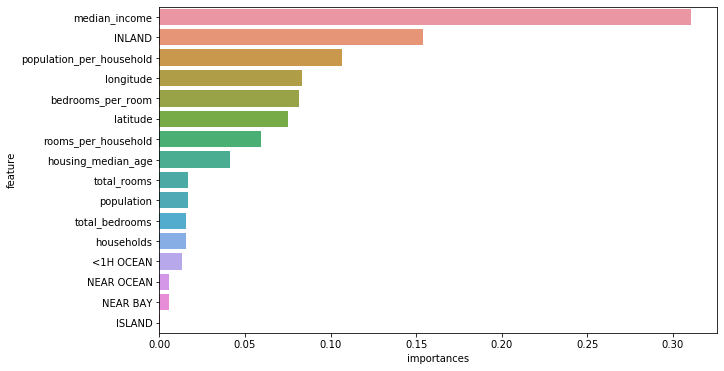

In [287]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

figure, ax = plt.subplots(1,1)
figure.set_size_inches(10, 6)
sns.barplot(data=df.sort_values(by="importances", ascending=False), y="feature", x="importances")
plt.show()